# Import libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns

from keras.preprocessing.image import load_img, save_img, img_to_array
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense,Dropout,Flatten
import os
print(os.listdir(r"C:/Users/LENOVO/Desktop/Python/archive (3)"))

['artists.csv', 'desktop.ini', 'images', 'resized']


# Reading data

In [2]:
artists=pd.read_csv('artists.csv')
artists.head(6)

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139


# Data visualization

<AxesSubplot:xlabel='count', ylabel='nationality'>

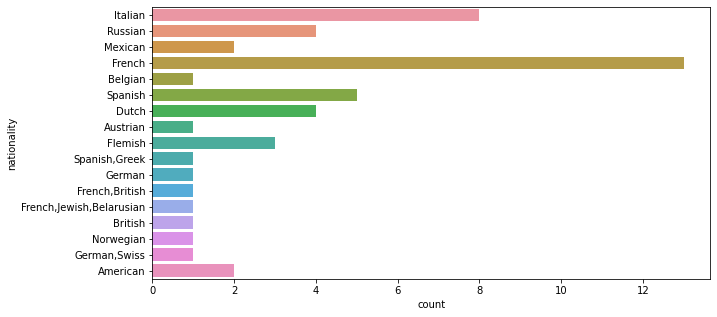

In [3]:
plt.figure(figsize=(10,5))
nationalityPlot = sns.countplot(y='nationality',data=artists)
nationalityPlot

[]

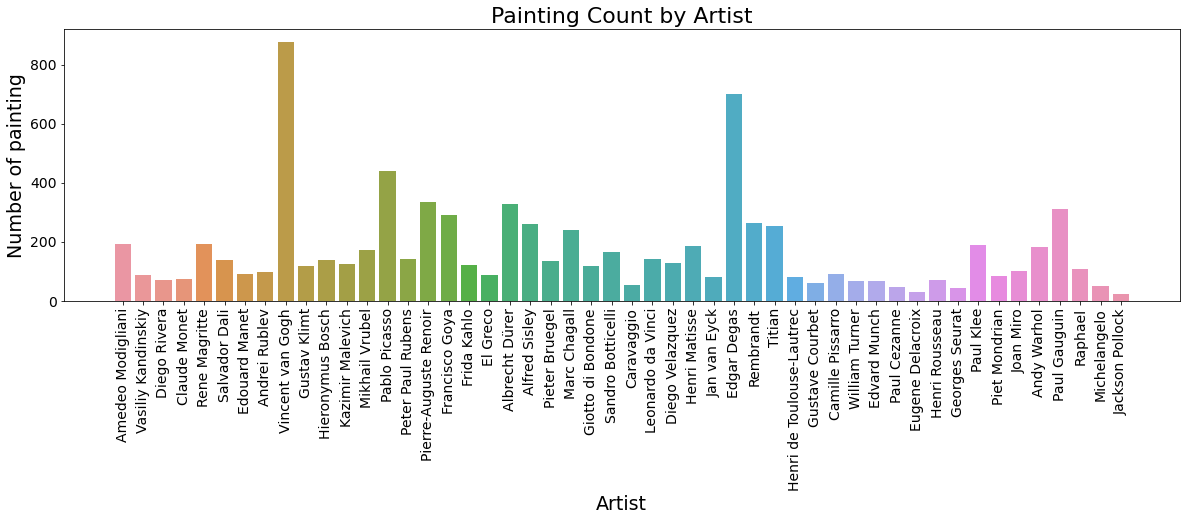

In [4]:
figsize=(20, 5)
ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "name"
col2 = "paintings"

sns.barplot(x=col1, y=col2, data=artists)
plt.title("Painting Count by Artist")
plt.xlabel("Artist")
plt.ylabel("Number of painting")
plt.xticks(rotation=90)
plt.plot()

In [5]:
def preprocess_image(image_path):
    
    from keras.applications import vgg19
    img = load_img(image_path)
    new_width  = 100
    new_height = 100
    img = img.resize((new_width, new_height))
    img = img_to_array(img)
    img=img.astype(int)
    return img

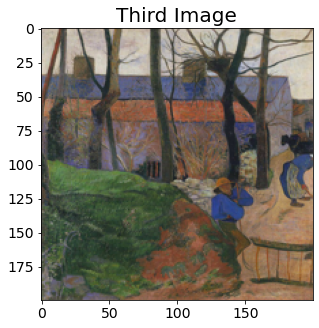

In [6]:
Path = r'C:/Users/LENOVO/Desktop/Python/archive (3)/images/images/'
plt.figure()
plt.title("Third Image",fontsize=20)
img1 = load_img(Path+'Paul_Gauguin/Paul_Gauguin_4.jpg')
new_width  = 200
new_height = 200
img1 = img1.resize((new_width, new_height))
img1 = img_to_array(img1)
plt.imshow(img1.astype(int))

<AxesSubplot:xlabel='count', ylabel='genre'>

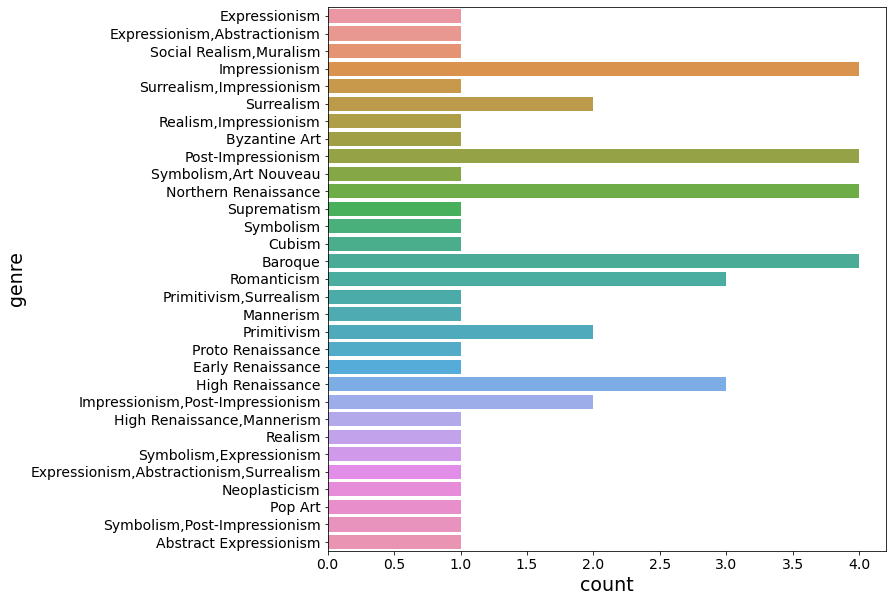

In [7]:
plt.figure(figsize=(10,10))
nationalityPlot = sns.countplot(y='genre',data=artists)
nationalityPlot

# Genre prediction

In [10]:
df = artists[artists.genre.str.contains(',')]
df = df.drop(columns = ['id', 'years', 'bio', 'wikipedia'])

In [11]:
import os
artist = []
current = []
path_art = []
FOLDER = r"C:\Users\LENOVO\Desktop\Python\resized/"

for name, genre, row in zip(df['name'], df['genre'], df['paintings']):
    nb_painting = 0
    while nb_painting < row:
        nb_painting += 1
        artist.append(name)
        current.append(genre)
        path_art.append(FOLDER + str(name) + '_' + str(nb_painting) + '.jpg')
        
data = {'artist': artist, 'genre': current, 'jpg': path_art}

In [12]:
df2 = pd.DataFrame(data)
df2.head()

,artist,genre,jpg
0,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...
1,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...
2,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...
3,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...
4,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...


In [13]:
df2['jpg'] = df2['jpg'].str.replace(' ', '_')

JPEG
RGB
(540, 540)


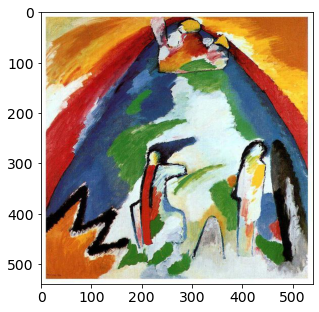

In [14]:
from PIL import Image

image = Image.open(df2['jpg'][8])

print(image.format)
print(image.mode)
print(image.size)

plt.imshow(image)

In [15]:
df2.to_csv('paintings_informations.csv', index=False)

In [16]:
df2.head()

,artist,genre,jpg
0,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...
1,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...
2,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...
3,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...
4,Vasiliy Kandinskiy,"Expressionism,Abstractionism",C:\Users\LENOVO\Desktop\Python\resized/Vasiliy...


In [17]:
df2.genre.unique()

array(['Expressionism,Abstractionism', 'Social Realism,Muralism',
       'Surrealism,Impressionism', 'Realism,Impressionism',
       'Symbolism,Art Nouveau', 'Primitivism,Surrealism',
       'Impressionism,Post-Impressionism', 'High Renaissance,Mannerism',
       'Symbolism,Expressionism',
       'Expressionism,Abstractionism,Surrealism',
       'Symbolism,Post-Impressionism'], dtype=object)

In [18]:
len(df2.genre.unique())

11

In [19]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import layers, regularizers, optimizers

In [20]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [67]:
train_generator=datagen.flow_from_dataframe(
dataframe=df2,
directory=None,
x_col="jpg",
y_col="genre",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

valid_generator=datagen.flow_from_dataframe(
dataframe=df2,
directory=None,
x_col="jpg",
y_col="genre",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=df2,
directory=None,
x_col="jpg",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224))

Found 1333 validated image filenames belonging to 11 classes.
Found 444 validated image filenames belonging to 11 classes.
Found 1777 validated image filenames.


In [68]:
input_shape = (224,224,3)

In [69]:
model = Sequential([

    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                 
                  input_shape=[224, 224, 3]),
    layers.MaxPool2D(),

    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(len(df2.genre.unique()), activation='softmax'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 128)     

In [70]:
import tensorflow as tf
from tensorflow import keras
from keras import losses 

In [71]:
keras.optimizers.Adam

keras.optimizer_v2.adam.Adam

In [72]:
model.compile(optimizer= "adam",   loss=losses.CategoricalCrossentropy(),
      metrics=["accuracy"])

In [73]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.01,
    restore_best_weights=True,
    )

In [74]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [75]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping])

<ipython-input-75-1a7cd727b781>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/10
41/41 [==============================] - 159s 3s/step - loss: 1.9215 - accuracy: 0.4166 - val_loss: 5.4533 - val_accuracy: 0.0000e+00
Epoch 2/10
41/41 [==============================] - 89s 2s/step - loss: 1.3574 - accuracy: 0.5857 - val_loss: 3.3047 - val_accuracy: 0.0000e+00
Epoch 3/10
41/41 [==============================] - 89s 2s/step - loss: 1.0550 - accuracy: 0.6849 - val_loss: 3.1867 - val_accuracy: 0.0024
Epoch 4/10
41/41 [==============================] - 88s 2s/step - loss: 0.7924 - accuracy: 0.7671 - val_loss: 4.2426 - val_accuracy: 0.0000e+00
Epoch 5/10
41/41 [==============================] - 88s 2s/step - loss: 0.5694 - accuracy: 0.8424 - val_loss: 3.8054 - val_accuracy: 0.0000e+00
Epoch 6/10
41/41 [==============================] - 88s 2s/step - loss: 0.4203 - accuracy: 0.8985 - val_loss: 5.7202 - val_accuracy: 0.0000e+00
Epoch 7/10
41/41 [==============================] - 88s 2s/step - loss: 0.3639 - accuracy: 0.9062 - val_loss: 3.7796 - val_accuracy: 0.0048

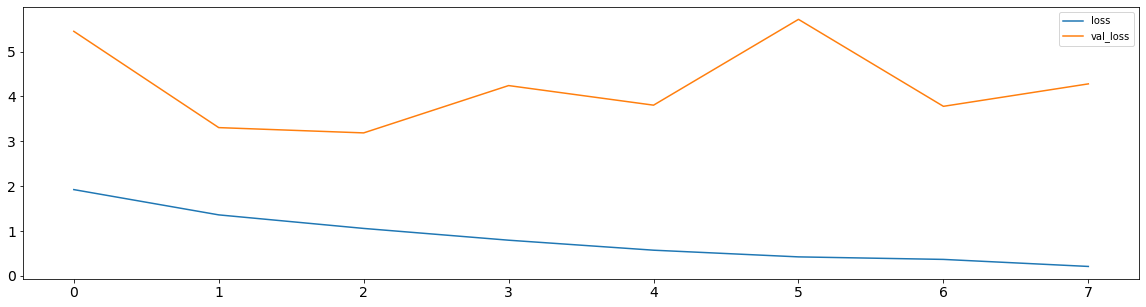

In [76]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

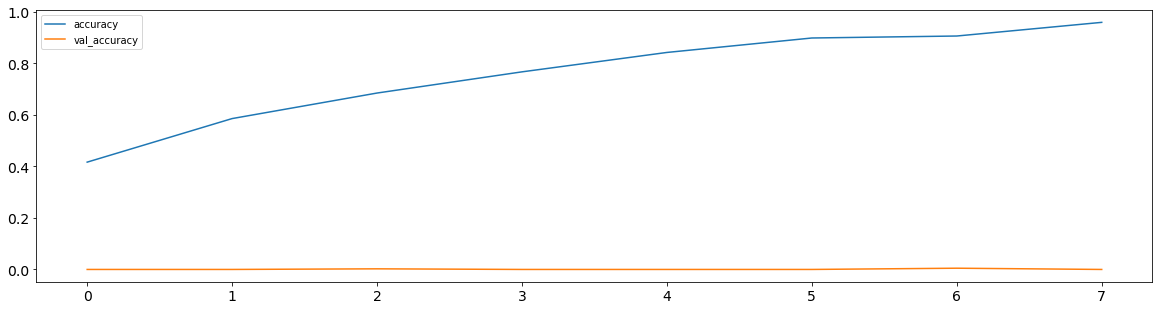

In [77]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();

Predicted current = Symbolism,Art Nouveau
Prediction probability = 46.86 %


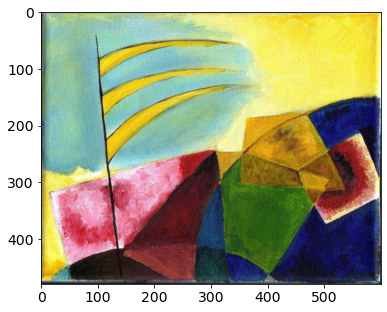

In [79]:
from keras import preprocessing

# Original image
path = df2['jpg'][5]
#print(path)
test_image = preprocessing.image.load_img(path, target_size=(224,224))

# Prediction
test_image = preprocessing.image.img_to_array(test_image)
test_image /= 255.
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
    
title = "Predicted current = {}\nPrediction probability = {:.2f} %" \
                .format(labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

plt = plt
plt.imshow(plt.imread(path))
print(title)

Predicted current = Expressionism,Abstractionism,Surrealism
Prediction probability = 46.01 %


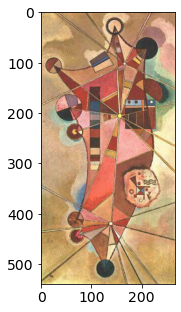

In [84]:
path = df2['jpg'][60]
#print(path)
test_image = preprocessing.image.load_img(path, target_size=(224,224))

# Prediction
test_image = preprocessing.image.img_to_array(test_image)
test_image /= 255.
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
    
title = "Predicted current = {}\nPrediction probability = {:.2f} %" \
                .format(labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)


plt = plt
plt.imshow(plt.imread(path))
print(title)

Predicted current = Primitivism,Surrealism
Prediction probability = 50.72 %


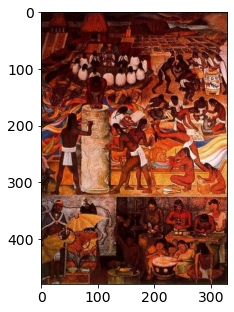

In [94]:
path = df2['jpg'][113]
test_image = preprocessing.image.load_img(path, target_size=(224,224))

test_image = preprocessing.image.img_to_array(test_image)
test_image /= 255.
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
    
title = "Predicted current = {}\nPrediction probability = {:.2f} %" \
                .format(labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

plt = plt
plt.imshow(plt.imread(path))
print(title)

# Denoising images

In [52]:
all_paint=[]
artists=os.listdir(Path)
for name in artists:
    paint=os.listdir(Path+name)
    for paints in paint:
        all_paint.append(preprocess_image(Path+name+'/'+paints))

len(all_paint)

8118

In [53]:
all_paint=np.stack(all_paint)
all_paint=all_paint.astype('float32')/255
all_paint.shape

(8118, 100, 100, 3)

In [54]:
noise_factor=0.5
x_train_noisy=all_paint+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=all_paint.shape)
x_train_noisy=np.clip(x_train_noisy,0.,1.)

In [55]:
x_test_noisy=x_train_noisy[round(len(x_train_noisy)*80/100):,:,:,:]
x_test=all_paint[round(len(all_paint)*80/100):,:,:,:]
x_train_noisy=x_train_noisy[:round(len(x_train_noisy)*80/100),:,:,:]
all_paint=all_paint[:round(len(all_paint)*80/100),:,:,:]

In [56]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))


model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3,(3,3),activation='sigmoid',padding='same'))

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy')
model.fit(x_train_noisy,all_paint,epochs=30,batch_size=64,shuffle=True,validation_data=(x_test_noisy,x_test))

Epoch 1/30
102/102 [==============================] - 136s 1s/step - loss: 0.5800 - val_loss: 0.5617
Epoch 2/30
102/102 [==============================] - 130s 1s/step - loss: 0.5506 - val_loss: 0.5591
Epoch 3/30
102/102 [==============================] - 130s 1s/step - loss: 0.5485 - val_loss: 0.5573
Epoch 4/30
102/102 [==============================] - 132s 1s/step - loss: 0.5466 - val_loss: 0.5555
Epoch 5/30
102/102 [==============================] - 130s 1s/step - loss: 0.5454 - val_loss: 0.5548
Epoch 6/30
102/102 [==============================] - 130s 1s/step - loss: 0.5446 - val_loss: 0.5547
Epoch 7/30
102/102 [==============================] - 130s 1s/step - loss: 0.5444 - val_loss: 0.5545
Epoch 8/30
102/102 [==============================] - 130s 1s/step - loss: 0.5437 - val_loss: 0.5541
Epoch 9/30
102/102 [==============================] - 130s 1s/step - loss: 0.5435 - val_loss: 0.5543
Epoch 10/30
102/102 [==============================] - 129s 1s/step - loss: 0.5432 - val_lo

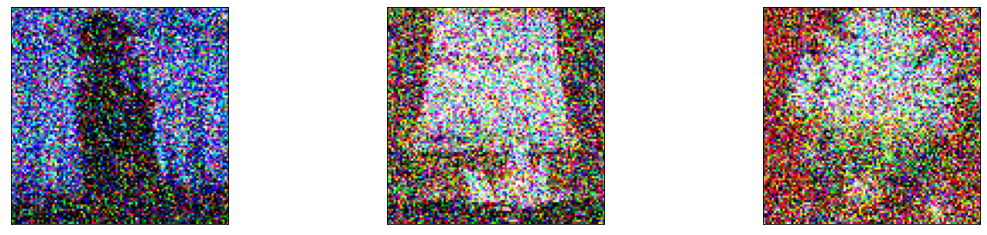

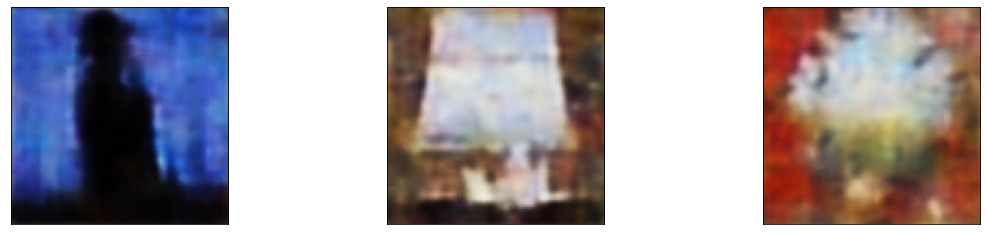

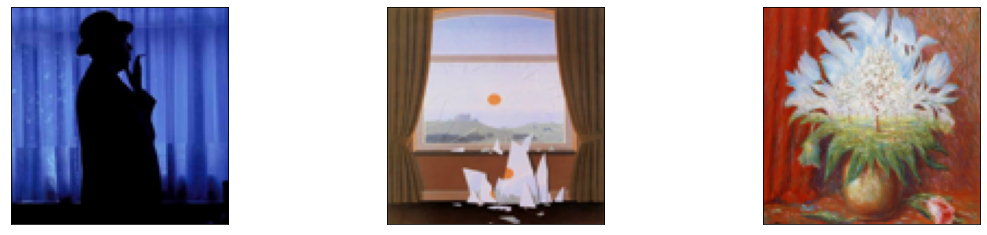

In [58]:
essai=model.predict(x_test_noisy)
n=15
plt.figure(figsize=(100,4))
for i in range (12,n):
    i=i+1
    ax=plt.subplot(1,n,i)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


plt.figure(figsize=(100,4))
for i in range (12,n):
    i=i+1
    ax=plt.subplot(1,n,i)
    plt.imshow(essai[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(100,4))
for i in range (12,n):
    i=i+1
    ax=plt.subplot(1,n,i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Colorization

In [59]:
class config():
    IMG_SIZE = (128, 128) 
def load_gry(img_path, img_size=config.IMG_SIZE):
    return cv2.resize(cv2.imread(img_path, 0), config.IMG_SIZE)

def load_rgb(img_path, img_size=config.IMG_SIZE):
    return cv2.resize(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB), dsize=config.IMG_SIZE)

In [60]:
img_paths = []
dirs =[r'C:/Users/LENOVO/Desktop/Python/archive (3)/images/images/']
for directory in dirs:
    for class_label in os.listdir(directory):
        for img in os.listdir(os.path.join(directory, class_label)):
            img_paths.append(os.path.join(directory, class_label, img))
        
len(img_paths)   

8118

In [61]:
from tqdm.auto import tqdm, trange
import cv2, os, random
%time
imgs_gry = np.array([load_gry(file_path) for file_path in tqdm(img_paths)])
imgs_rgb = np.array([load_rgb(file_path) for file_path in tqdm(img_paths)])

Wall time: 0 ns


  0%|          | 0/8118 [00:00<?, ?it/s]

  0%|          | 0/8118 [00:00<?, ?it/s]

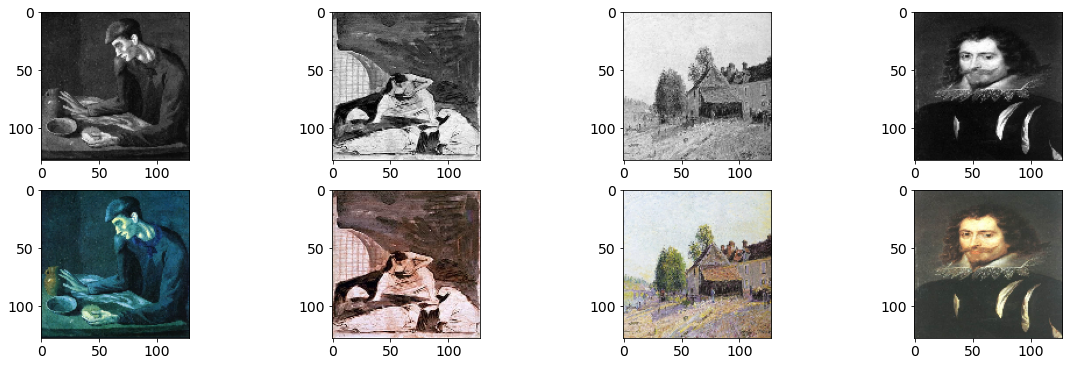

In [62]:
random.seed(30)
idx_to_plot = random.choices(range(len(img_paths)), k=4)

fig, ax = plt.subplots(2, 4, figsize=(20, 6))
for i, j in enumerate(idx_to_plot):
    ax[0][i].imshow(imgs_gry[j], cmap='gray')
    ax[1][i].imshow(imgs_rgb[j])